# Libraries

In [ ]:
import numpy as np
import pandas as pd
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Layer, MultiHeadAttention, LayerNormalization, Add
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Layer, Input


# LOADING DATA


In [ ]:
# Prompt the user to upload the file
uploaded = files.upload()

# Get the filename and file content
filename = list(uploaded.keys())[0]
file_content = uploaded[filename]

# Read the file into a pandas DataFrame
try:
    df = pd.read_csv(io.BytesIO(file_content))
    display(df.head())
except Exception as e:
    print(f"Error reading the file: {e}")

Saving starbucks_open_7year.csv to starbucks_open_7year (1).csv


,Unnamed: 0,Date,Open,Time
0,0,11/13/2017,56.81,1.510531e+09
1,1,11/14/2017,56.47,1.510618e+09
2,2,11/15/2017,56.82,1.510704e+09
3,3,11/16/2017,56.92,1.510790e+09
4,4,11/17/2017,57.24,1.510877e+09


# DATA PREPROCEESING


In [ ]:
# Loading data
data = pd.read_csv("starbucks_open_7year.csv")
# Converting the index to a column named 'Date' since the name is mentioned as an index value rather than as a column name
data = data.reset_index()

# Convert the 'Date' column to datetime objects if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values(by=['Date'])

# Check for duplicate dates
duplicate_dates = data[data.duplicated(subset=['Date'], keep=False)]
if not duplicate_dates.empty:
    print("Duplicate dates found:")
    print(duplicate_dates)
    # Handle duplicate dates (e.g., remove duplicates, average values, etc.)
    # Example: Remove duplicates, keeping the first occurrence
    data = data.drop_duplicates(subset=['Date'], keep='first')

# Check for missing dates
# Create a date range for the expected dates
date_range = pd.bdate_range(start=data['Date'].min(), end=data['Date'].max())  #, freq='D'

# Find missing dates
missing_dates = date_range[~date_range.isin(data['Date'])]

if len(missing_dates) > 0:
    print("Missing dates found:")
    print(missing_dates)

Missing dates found:
DatetimeIndex(['2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19',
               '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28',
               '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-04-10', '2020-05-25', '2020-07-03', '2020-09-07',
               '2020-11-26', '2020-12-25', '2021-01-01', '2021-01-18',
               '2021-02-15', '2021-04-02', '2021-05-31', '2021-07-05',
               '2021-09-06', '2021-11-25', '2021-12-24', '2022-01-17',
               '2022-02-21', '2022-04-15', '2022-05-30', '2022-06-20',
               '2022-07-04', '2022-09-05', '2022-11-24', '2022-12-26',
               '2023-01-02', '2023-01-16', '2023-02-20', '2023-04-07',
               '2023-05-29', '2023-06-19', '2023-07-04',

# DATA VISUALIZATION

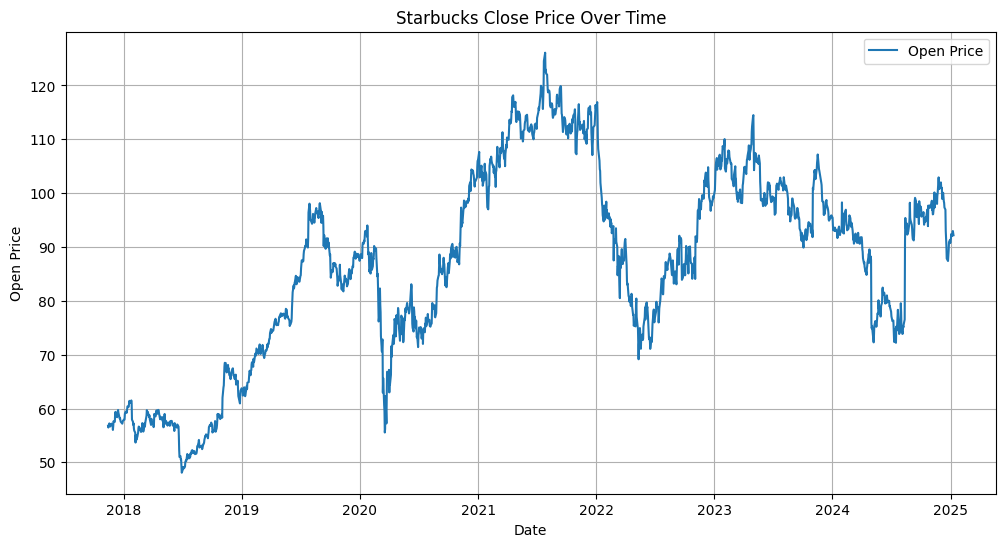

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open'], label='Open Price')
plt.title('Starbucks Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

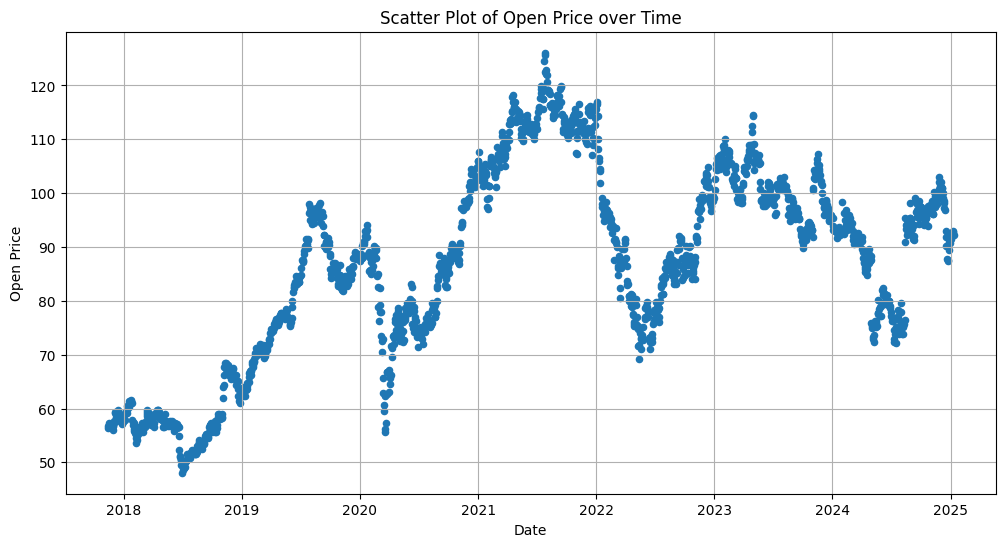

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.scatter(data['Date'], data['Open'], marker='o', s=20)  # s is marker size

plt.title('Scatter Plot of Open Price over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

# DIVIDING TRAIN/VAL/TEST DATA

In [ ]:
# 1. Split into training and remaining data (20%)
train_data, remaining_data = train_test_split(data, test_size=0.2, shuffle=False)

# 2. Split remaining data into validation and testing (10% each)
validation_data, test_data = train_test_split(remaining_data, test_size=0.5, shuffle=False)

# MODEL 1 : FNN

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0366 - mae: 0.1263 - val_loss: 6.8774e-04 - val_mae: 0.0159
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6659e-04 - mae: 0.0142 - val_loss: 6.5375e-04 - val_mae: 0.0157
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4318e-04 - mae: 0.0130 - val_loss: 6.5220e-04 - val_mae: 0.0156
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9495e-04 - mae: 0.0137 - val_loss: 6.7650e-04 - val_mae: 0.0157
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9949e-04 - mae: 0.0138 - val_loss: 6.5441e-04 - val_mae: 0.0156
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6263e-04 - mae: 0.0138 - val_loss: 6.6229e-04 - val_mae: 0.0161
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3609e-04 - mae: 0.0130 - val_loss: 7.0204e-04 - val_mae: 0.0175
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4790e-04 - mae: 0.0134 - val_loss: 6.5643e-04 - val_mae: 0.0157
Epoch 9/50
90/90 ━━━━━━

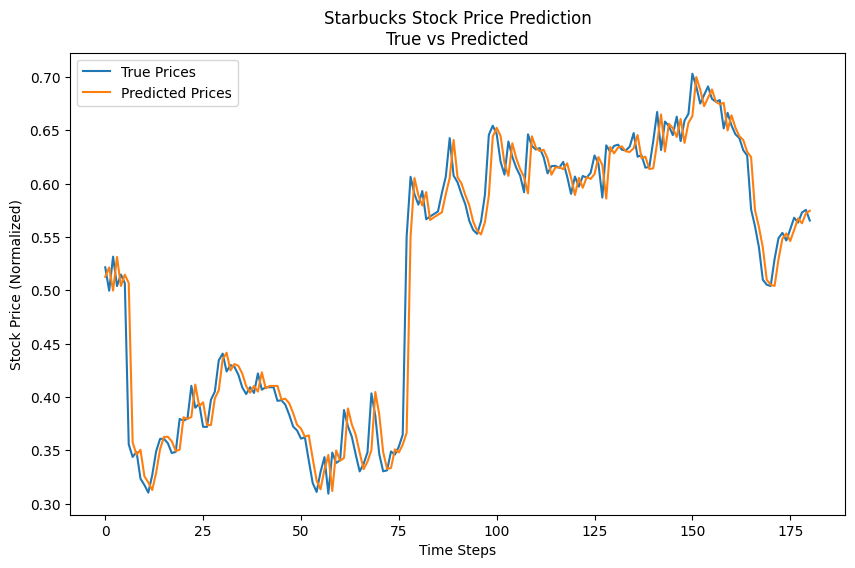

In [ ]:
data = data[['Open']]  # Selecting only the 'Open' price column

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Prepare input-output pairs
X = data_scaled[:-1]  # All except the last value as features
y = data_scaled[1:]  # All except the first value as labels

# Train-test split
total_size = len(X)
train_size = int(total_size * 0.8)
val_size = int(total_size * 0.1)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

# Define the MLP model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Compute evaluation metrics

y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Compute evaluation metrics on unscaled values
mae_FNN = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse_FNN = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2_FNN = r2_score(y_test_rescaled, y_pred_rescaled)
mape_FNN = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100  # MAPE in %

print(f'Test MAE: {mae_FNN}')
print(f'Test MSE: {mse_FNN}')
print(f'Test R2 Score: {r2_FNN}')
print(f'Test MAPE: {mape_FNN:.2f}%')
# Visualize predictions
plt.figure(figsize=(10,6))
plt.plot(y_test, label='True Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Starbucks Stock Price Prediction\nTrue vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price (Normalized)')
plt.legend()
plt.show()  # This will display the plot



# MODEL 2: LSTM (LONG SHORT TERM MEMORY)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0684 - val_loss: 0.0019
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0013 - val_l

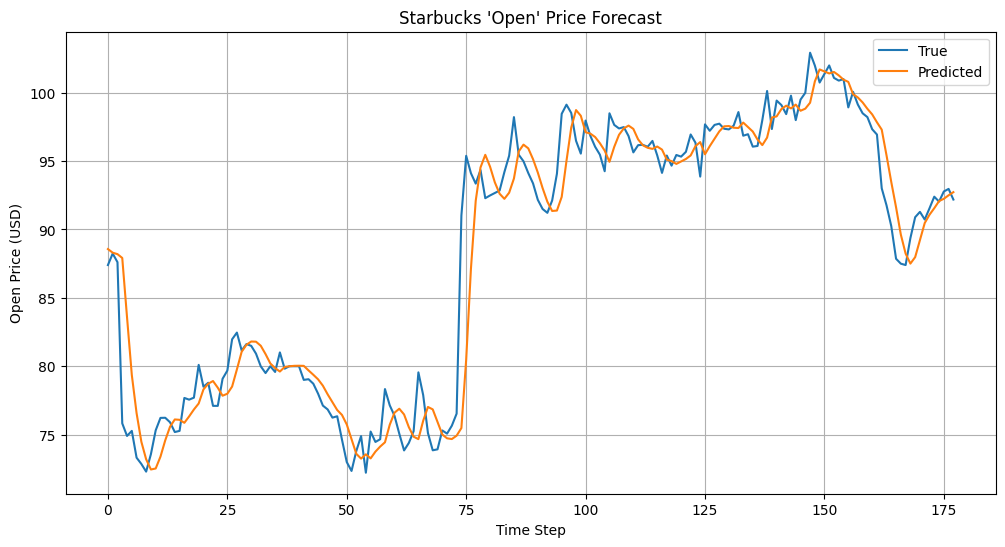

MAE:  1.6095
MAPE: 1.86%
MSE:  7.0736
R²:   0.9244


In [ ]:
# Normalize the 'Open' prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open']])

# Create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 20
X, y = create_sequences(scaled_data, sequence_length)

# Train / val / test split
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

# Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)],
    verbose=1
)

# Evaluation
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predictions
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='True')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Starbucks 'Open' Price Forecast")
plt.xlabel("Time Step")
plt.ylabel("Open Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Mean Absolute Error (MAE)
mae_LSTM = mean_absolute_error(y_test_inv, y_pred_inv)

# Mean Absolute Percentage Error (MAPE)
mape_LSTM = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Mean Squared Error (MSE)
mse_LSTM = mean_squared_error(y_test_inv, y_pred_inv)

# R² Score
r2_LSTM = r2_score(y_test_inv, y_pred_inv)

# Print the results
print(f"MAE:  {mae_LSTM:.4f}")
print(f"MAPE: {mape_LSTM:.2f}%")
print(f"MSE:  {mse_LSTM:.4f}")
print(f"R²:   {r2_LSTM:.4f}")

# MODEL 3: TCN(TEMPORAL CONVOLUTIONAL NETWORK) WITH ATTENTION

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0974 - val_loss: 0.0037
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.0043
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0116 - val_loss: 0.0015
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0091 - val_loss: 0.0030
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0078 - val_loss: 0.0028
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - val_loss: 0.0060
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0090 - val_loss: 0.0032
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068 - val_loss: 0.0028
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0064 - val_loss: 0.0018
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.006

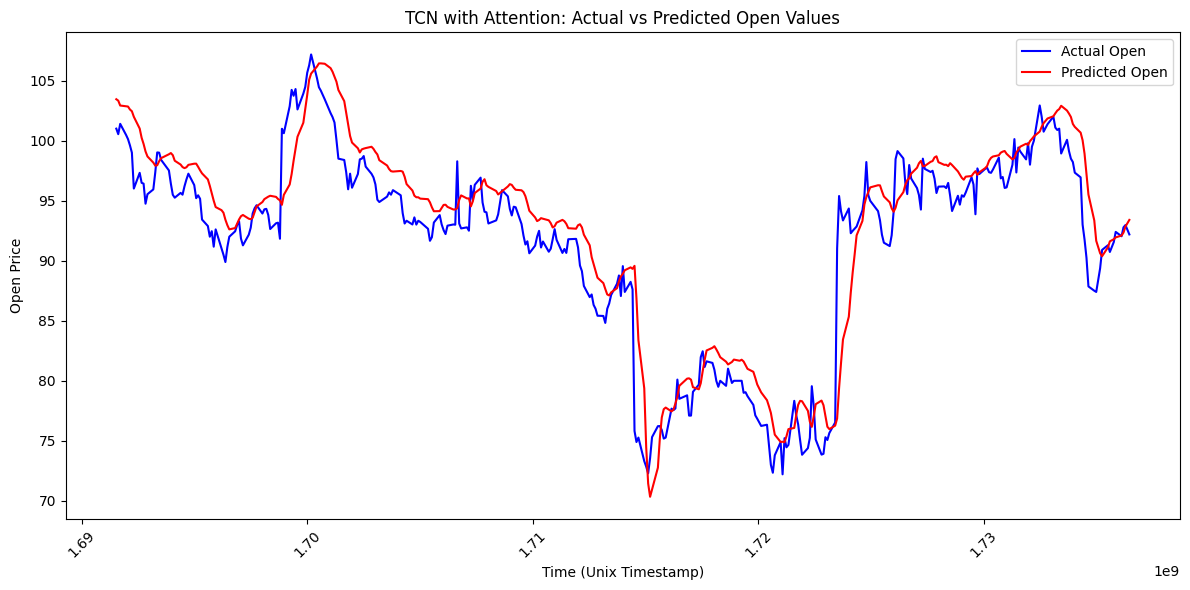

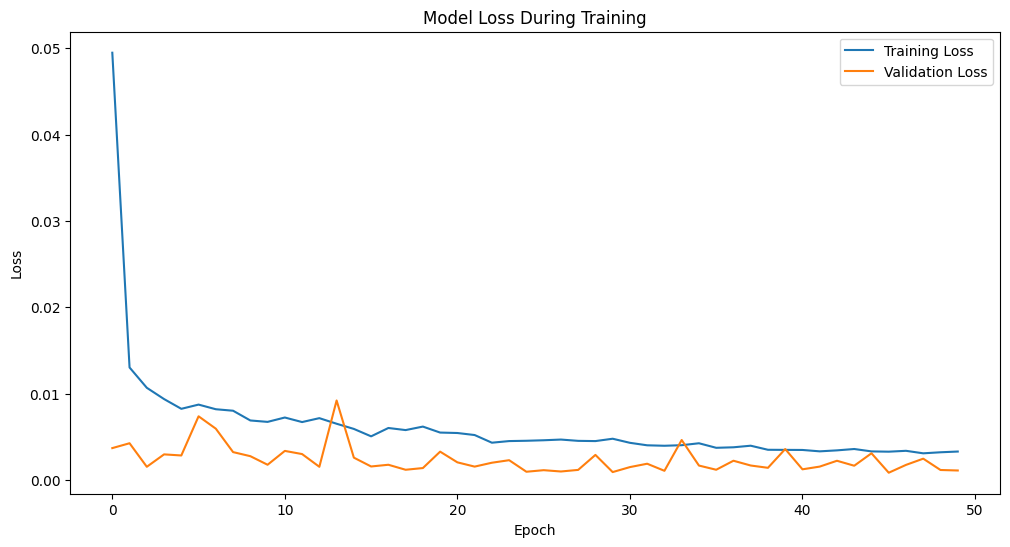

In [ ]:
# Custom Metrics Functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Attention Layer
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        # Alignment scores
        e = K.tanh(K.dot(inputs, self.W) + self.b)
        # Attention weights
        alpha = K.softmax(e, axis=1)
        # Context vector
        context = inputs * alpha
        return K.sum(context, axis=1)

data = pd.read_csv("starbucks_open_7year.csv")

data = data[['Time', 'Open']]
open_values = data['Open'].values.reshape(-1, 1)
time_values = data['Time'].values

# Normalize the data
scaler = MinMaxScaler()
open_scaled = scaler.fit_transform(open_values)

# Create sequences for time series prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(open_scaled, seq_length)

# Split into training and testing sets (no shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 2: Build the TCN with Attention Model
def build_tcn_attention_model(input_shape):
    inputs = Input(shape=input_shape)

    # TCN layers (stacked Conv1D with increasing dilation)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=1, padding='causal', activation='relu')(inputs)
    x = Dropout(0.2)(x)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=2, padding='causal', activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=4, padding='causal', activation='relu')(x)
    x = Dropout(0.2)(x)

    # Attention mechanism
    attention_output = AttentionLayer()(x)

    # Fully connected layers
    x = Dense(32, activation='relu')(attention_output)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Define input shape
input_shape = (seq_length, 1)
model = build_tcn_attention_model(input_shape)

# Step 3: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Step 4: Evaluate the Model
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

# Calculate metrics
mae_TCN = mean_absolute_error(y_test_orig, y_pred)
mse_TCN = mean_squared_error(y_test_orig, y_pred)
rmse_value_TCN = rmse(y_test_orig, y_pred)
mape_value_TCN = mape(y_test_orig, y_pred)
r2_TCN = r2_score(y_test_orig, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae_TCN:.4f}")
print(f"Mean Squared Error (MSE): {mse_TCN:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_value_TCN:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_value_TCN:.4f}%")
print(f"R-squared (R²): {r2_TCN:.4f}")

# Step 5: Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(time_values[-len(y_test):], y_test_orig, label='Actual Open', color='blue')
plt.plot(time_values[-len(y_pred):], y_pred, label='Predicted Open', color='red')
plt.title('TCN with Attention: Actual vs Predicted Open Values')
plt.xlabel('Time (Unix Timestamp)')
plt.ylabel('Open Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MODEL 4: GUI(GATED INFORMER UNIT)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3905 - val_loss: 0.0315
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0331 - val_loss: 0.0113
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0211 - val_loss: 0.0022
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - val_loss: 0.0013
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0089 - val_loss: 6.4590e-04
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0074 - val_loss: 5.8295e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052 - val_loss: 0.0019
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035 - val_loss: 7.2114e-04
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

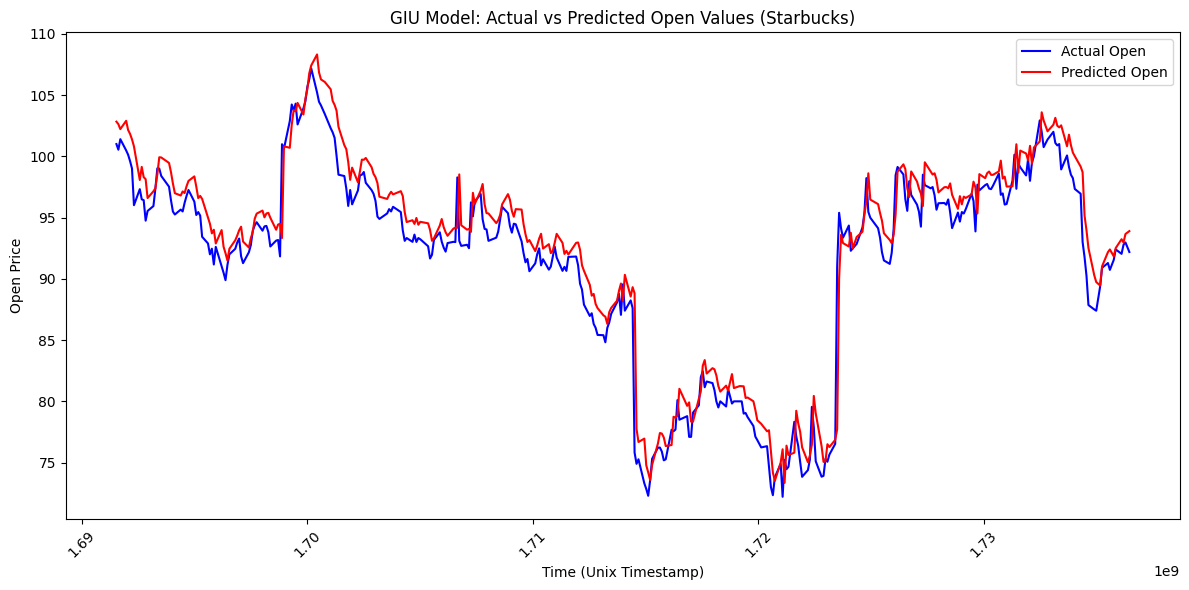

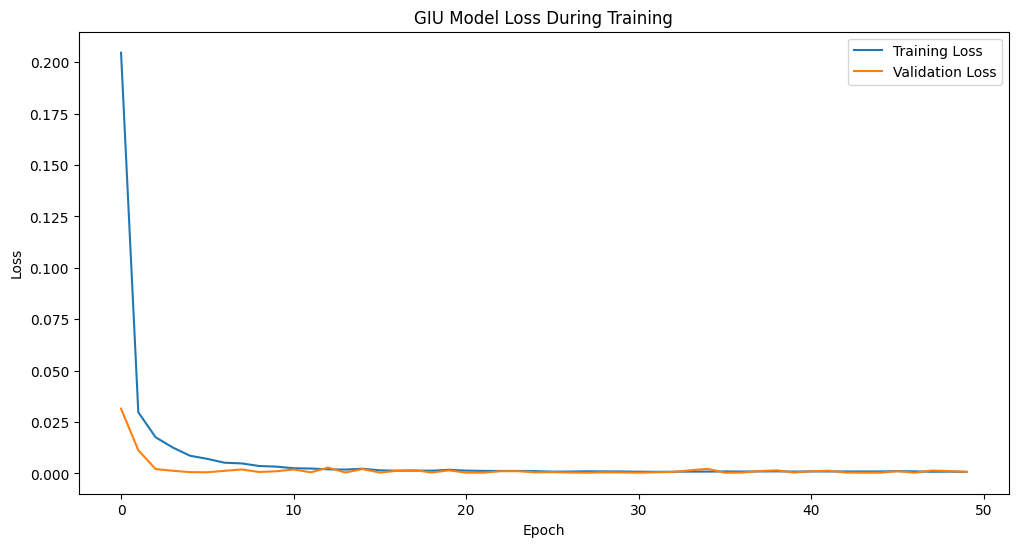

In [ ]:
# Gating Layer
class GatingLayer(Layer):
    def __init__(self, **kwargs):
        super(GatingLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_gate = self.add_weight(name='gate_weight', shape=(input_shape[-1], input_shape[-1]),
                                      initializer='glorot_uniform', trainable=True)
        self.b_gate = self.add_weight(name='gate_bias', shape=(input_shape[-1],),
                                      initializer='zeros', trainable=True)
        super(GatingLayer, self).build(input_shape)

    def call(self, inputs):
        gate = K.sigmoid(K.dot(inputs, self.W_gate) + self.b_gate)
        return inputs * gate

# GIU (Gated Informer Unit) Model
def build_giu_model(input_shape, num_heads=4, d_model=64, d_ff=128):
    inputs = Input(shape=input_shape)

    # Projection to d_model dimension
    x = Dense(d_model)(inputs)

    # Multi-Head Self-Attention (Informer-style)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model // num_heads)(x, x)
    attn_output = Dropout(0.1)(attn_output)
    x = Add()([x, attn_output])
    x = LayerNormalization(epsilon=1e-6)(x)

    # Gating Mechanism
    x = GatingLayer()(x)

    # Feed-Forward Network
    ff_output = Dense(d_ff, activation='relu')(x)
    ff_output = Dropout(0.1)(ff_output)
    ff_output = Dense(d_model)(ff_output)
    x = Add()([x, ff_output])
    x = LayerNormalization(epsilon=1e-6)(x)

    # Output layer
    outputs = Dense(1)(x[:, -1, :])  # Predict only the last time step

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Step 1: Load and Preprocess the Data
data = pd.read_csv("starbucks_open_7year.csv")

# Use only 'Time' and 'Open' columns
data = data[['Time', 'Open']]
open_values = data['Open'].values.reshape(-1, 1)
time_values = data['Time'].values  # For reference in visualization

# Normalize the data
scaler = MinMaxScaler()
open_scaled = scaler.fit_transform(open_values)

# Create sequences for time series prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps to look back
X, y = create_sequences(open_scaled, seq_length)

# Split into training and testing sets (no shuffling for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 2: Build and Train the GIU Model
input_shape = (seq_length, 1)
model = build_giu_model(input_shape)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Step 3: Evaluate the Model
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_orig = scaler.inverse_transform(y_test)

# Calculate metrics
mae_GIU = mean_absolute_error(y_test_orig, y_pred)
mse_GIU = mean_squared_error(y_test_orig, y_pred)
rmse_value_GIU = rmse(y_test_orig, y_pred)
mape_value_GIU = mape(y_test_orig, y_pred)
r2_GIU = r2_score(y_test_orig, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae_GIU:.4f}")
print(f"Mean Squared Error (MSE): {mse_GIU:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_value_GIU:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_value_GIU:.4f}%")
print(f"R-squared (R²): {r2_GIU:.4f}")

# Step 4: Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(time_values[-len(y_test):], y_test_orig, label='Actual Open', color='blue')
plt.plot(time_values[-len(y_pred):], y_pred, label='Predicted Open', color='red')
plt.title('GIU Model: Actual vs Predicted Open Values (Starbucks)')
plt.xlabel('Time (Unix Timestamp)')
plt.ylabel('Open Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GIU Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATION

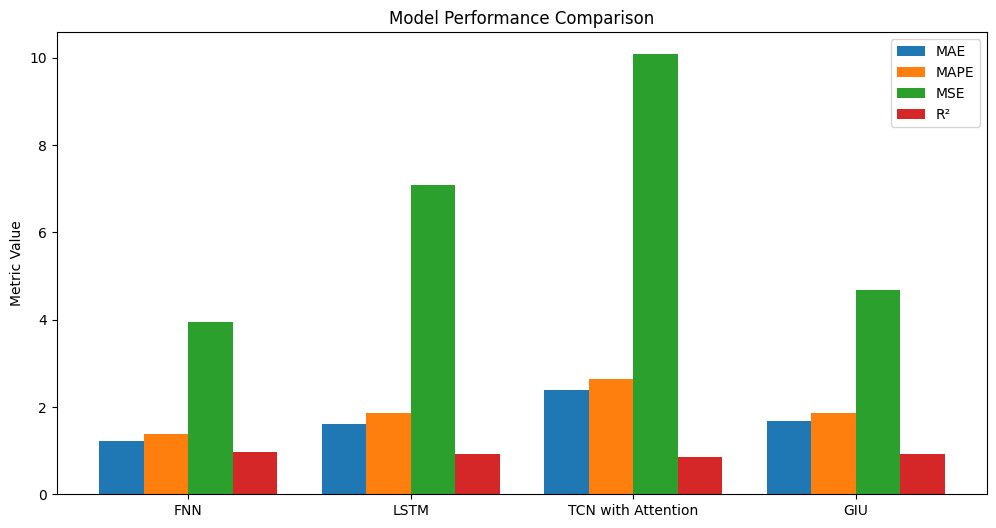

In [ ]:
# Model names and evaluation metrics
models = ['FNN', 'LSTM', 'TCN with Attention', 'GIU']
mae_values = [mae_FNN, mae_LSTM, mae_TCN, mae_GIU]
mape_values = [mape_FNN, mape_LSTM, mape_value_TCN, mape_value_GIU]
mse_values = [mse_FNN, mse_LSTM, mse_TCN, mse_GIU]
r2_values = [r2_FNN, r2_LSTM, r2_TCN, r2_GIU]

# Set up the bar positions
x = np.arange(len(models))
width = 0.2

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width*1.5, mae_values, width, label='MAE')
rects2 = ax.bar(x - width/2, mape_values, width, label='MAPE')
rects3 = ax.bar(x + width/2, mse_values, width, label='MSE')
rects4 = ax.bar(x + width*1.5, r2_values, width, label='R²')

# Add labels, title, and legend
ax.set_ylabel('Metric Value')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.show()